In [14]:
import Customers
import matplotlib.pyplot as plt
import numpy as np

# Testing class Customer()

## Customer.setThresholdLinear()

### Testing that it matches histogram of true p.m.f.

To test this function we will generate $10^4$ samples using the `customer.setThresholdLinear()` function and generate a histogram. This should match with the true probability mass function, which will be a linearly decreasing function.

In [15]:
#set the minimum and maximum price for our test
#these are also the defaults of the `setThresholdLinear()` function
min_price = 0
max_price = 100

In [16]:
#Generate 10000 RVs from Customer.setThresholdLinear()
thresholds_hist = []
cumlative = [0]*(max_price + 1 - min_price)
for i in range(10000):
    customer = Customers.Customer()
    customer.setThresholdLinear(min_price,max_price)
    
    #this will be used for the histogram
    thresholds_hist.append(customer.getThreshold())

    #this will be used later
    cumlative[int(customer.getThreshold())] +=1



In [17]:
#create the true probability mass function
x = range(min_price,max_price+1)
y = [i/sum(x) for i in x.__reversed__()]

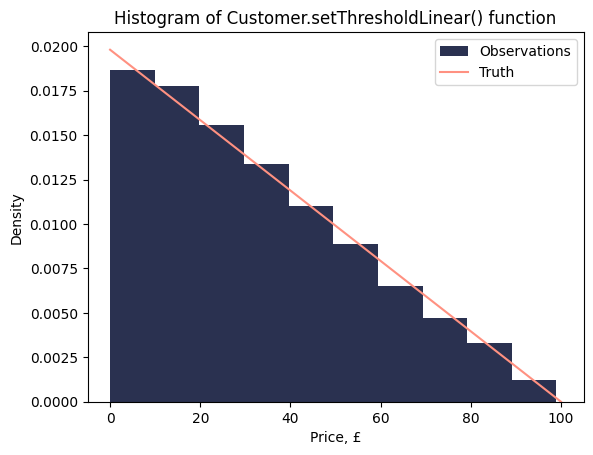

In [18]:
#Create histogram of RV observation
plt.hist(thresholds_hist,density = True,color = (42/255,49/255,80/255),label='Observations')
#overlay with true pmf the observations came from
plt.plot(y,label = 'Truth',color=(255/255,145/255,129/255))
plt.ylabel("Density")
plt.xlabel("Price, £")
plt.title("Histogram of Customer.setThresholdLinear() function")
plt.legend()
plt.show()

### Looking at expected revenue

In [19]:
#normalise our cumlative list to create a sampled cdf
sampled_cumlative = [count/sum(cumlative) for count in cumlative]

#set up vector for sampled survival function
sampled_survival = []
sampled_expectation = []
for price in range(min_price,max_price+1):
    sampled_survival.append(sum(sampled_cumlative[price:max_price+1]))
    sampled_expectation.append(sampled_survival[price]*price)

#using the true pmf we then create a true survival funtion and expectation
true_survival = [sum(y[price:max_price+1]) for price in range(min_price,max_price+1)]
true_expectation = [true_survival[price]*price for price in range(min_price,max_price+1)]


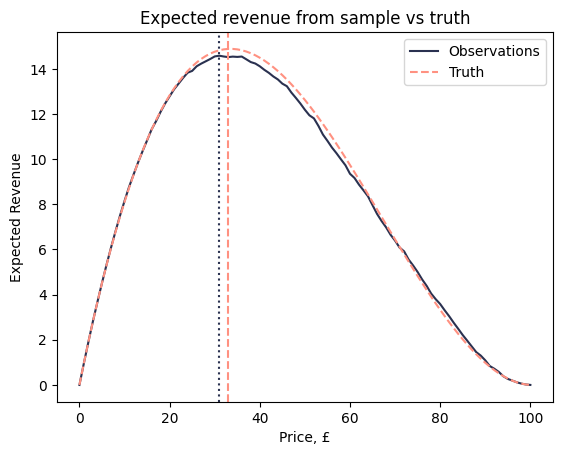

In [20]:
plt.plot(sampled_expectation,color = (42/255,49/255,80/255),label='Observations')
plt.plot(true_expectation,'--',label = 'Truth',color=(255/255,145/255,129/255))
plt.axvline(np.argmax(sampled_expectation),linestyle=':',color = (42/255,49/255,80/255))
plt.axvline(np.argmax(true_expectation),linestyle='--',color=(255/255,145/255,129/255))
plt.title('Expected revenue from sample vs truth')
plt.ylabel('Expected Revenue')
plt.xlabel('Price, £')
plt.legend()
plt.show()

## Customer.setLeadTimeUniform()

### Testing that it matches true p.m.f.

To test this function we will generate $10^4$ samples using the `customer.setLeadTimeUniform()` function and generate a plot of sampled observations. This should match with the true probability mass function, which will be a discrete uniform distribution.

In [21]:
#set the minimum and maximum lead times for our test
#these are also the defaults of the `setLeadTimeUniform()` function
min_lead = 1
max_lead = 7

In [22]:
#Generate 10000 RVs from Customer.setLeadTimeUniform()
lead_time_count = [0]+[0]*(max_lead+1-min_lead)
for i in range(10000):
    customer = Customers.Customer()
    customer.setLeadTimeUniform(min_lead,max_lead)
    
    #this will be used for the verification plot
    lead_time_count[customer.getLeadTime()] += 1

normalised_lead_time = [count/sum(lead_time_count) for count in lead_time_count]

#create the true probability mass function
unif_prob = [0]+[1/(max_lead+1-min_lead)]*(max_lead+1-min_lead)

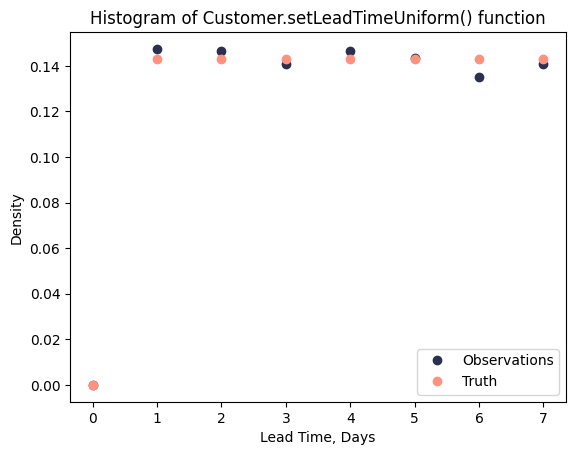

In [23]:
#Create histogram of RV observation
plt.plot(normalised_lead_time,'o',color = (42/255,49/255,80/255),label = 'Observations')
#overlay with true pmf the observations came from
plt.plot(unif_prob,'o',label = 'Truth',color=(255/255,145/255,129/255))
plt.ylabel("Density")
plt.xlabel("Lead Time, Days")
plt.title("Histogram of Customer.setLeadTimeUniform() function")
plt.legend()
plt.show()

## Customer.setLoSUniform()

### Testing that it matches true p.m.f.

To test this function we will generate $10^4$ samples using the `customer.setLoSUniform()` function and generate a plot of sampled observations. This should match with the true probability mass function, which will be a discrete uniform distribution.

In [24]:
#set the minimum and maximum length of stays for our test
#these are also the defaults of the `setLoSUniform()` function
min_LoS = 1
max_LoS = 2

In [25]:
#Generate 10000 RVs from Customer.setLeadTimeUniform()
LoS_count = [0]+[0]*(max_LoS+1-min_LoS)
for i in range(10000):
    customer = Customers.Customer()
    customer.setLoSUniform(min_LoS,max_LoS)
    
    #this will be used for the verification plot
    LoS_count[customer.getLoS()] += 1

normalised_LoS = [count/sum(LoS_count) for count in LoS_count]

#create the true probability mass function
unif_prob_LoS = [0]+[1/(max_LoS+1-min_LoS)]*(max_LoS+1-min_LoS)

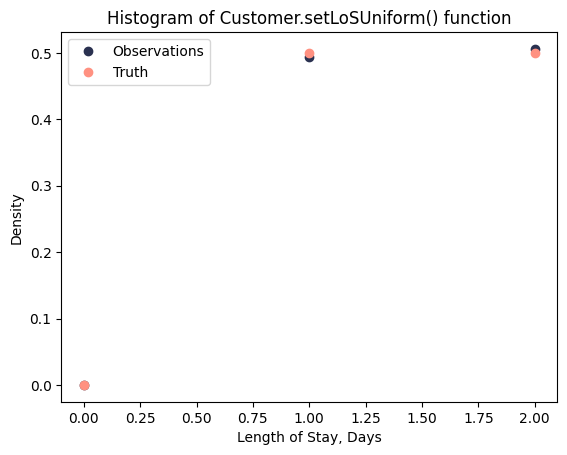

In [26]:
#Create histogram of RV observation
plt.plot(normalised_LoS,'o',color = (42/255,49/255,80/255),label = 'Observations')
#overlay with true pmf the observations came from
plt.plot(unif_prob_LoS,'o',label = 'Truth',color=(255/255,145/255,129/255))
plt.ylabel("Density")
plt.xlabel("Length of Stay, Days")
plt.title("Histogram of Customer.setLoSUniform() function")
plt.legend()
plt.show()